## Brief Projet : 

Vous êtes un data analyst ,vous travaillez en bénévolat pour la médiathèque de la ville qui a mis en place un site web pour la vente de certains livres de son stock.. et elle souhaite analyser les caractéristiques sa clientèle pour mieux comprendre les tendances de leurs reservations/achats de livres. 

La médiathèque vous donne accès à leur site : http://books.toscrape.com/index.html. et souhaite que vous collectez/analysez leurs données.

**Objectifs**  :
- Découvrir les bases du scraping web avec requests et BeautifulSoup.

- Structurer les données avec pandas.

- Utiliser SQLite pour stocker localement.

- Créer une API FastAPI avec 3 routes simples.


**Étapes du projet** :

1. **Collecte de données** : 
* Utiliser la bibliothèque `requests` pour envoyer des requêtes HTTP au site web qui répertorie les livres. Vous récupérez le contenu HTML de la page web.

* A l'aide de la bibliothèque `Beautiful Soup`, analyser le contenu HTML du site et extraire les informations pertinentes: parcourir le code HTML, identifier les balises cibles (qui contiennent les données sur les livres, telles que `<div>` ou `<li>` ) et extraire les informations pertinentes telles que le nom du livre, la catégorie, la note moyenne des avis, le nombre de livres en stock, le prix etc.

2. **Nettoyage et préparation des données** : nettoyer les valeurs, convertir les types de données si nécessaire, gérer les valeurs manquantes, etc.

3. **Stockage des données** : 
* Proposer une modélisation de base de données SQL adaptée. 
* Créer le schéma de la base de données , les différentes tables pour stocker les données propres sur les livres.

4. **Analyse des données** : 

* Faire une analyse exploratoire des données : identification de KPIs pertinents ,création de graphiques, le calcul de statistiques descriptives, l'identification de tendances, etc => pour aider la médiathèque à mieux faire son étude de clientèle. 



### Importer les librairies

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Collecte de données

####  Récupérer les livres de la première page

In [2]:
# URL de la page principale
url = "http://books.toscrape.com/"



In [3]:
# URL de la page principale
url = "http://books.toscrape.com/"
#url="http://books.toscrape.com/catalogue/page-1.html"
# Envoyer une requête GET à l'URL
response = requests.get(url)
response.encoding = 'utf-8'

# Vérifier si la requête s'est bien déroulée
if response.status_code == 200:
    # Analyser le contenu HTML de la page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Trouver tous les liens de livres sur la page principale
    book_links = soup.find_all('h3')

    
    # Parcourir les liens de livres
    for link in book_links:
        # Extraire le titre du livre
        title = link.a.attrs['title']

        # Accéder à la page de détails du livre
        book_url = url + link.a.attrs['href']
        book_response = requests.get(book_url)
        book_response.encoding ='utf-8'
        book_soup = BeautifulSoup(book_response.text, 'html.parser')

        # Extraire le prix du livre
        price = book_soup.find('p', class_='price_color').text

        # Extraire la notation du livre
        rating = book_soup.find('p', class_='star-rating')['class'][1]

        # Imprimer les informations extraites
        print(f"Titre : {title}")
        print(f"Price : {price}")
        print(f"Rating : {rating}")


Titre : A Light in the Attic
Price : £51.77
Rating : Three
Titre : Tipping the Velvet
Price : £53.74
Rating : One
Titre : Soumission
Price : £50.10
Rating : One
Titre : Sharp Objects
Price : £47.82
Rating : Four
Titre : Sapiens: A Brief History of Humankind
Price : £54.23
Rating : Five
Titre : The Requiem Red
Price : £22.65
Rating : One
Titre : The Dirty Little Secrets of Getting Your Dream Job
Price : £33.34
Rating : Four
Titre : The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price : £17.93
Rating : Three
Titre : The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price : £22.60
Rating : Four
Titre : The Black Maria
Price : £52.15
Rating : One
Titre : Starving Hearts (Triangular Trade Trilogy, #1)
Price : £13.99
Rating : Two
Titre : Shakespeare's Sonnets
Price : £20.66
Rating : Four
Titre : Set Me Free
Price : £17.46
Rating : Five
Titre : Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Price : 

In [4]:
print(link)
# il sort le dernier car c'est la dernière itération ?!?

<h3><a href="catalogue/its-only-the-himalayas_981/index.html" title="It's Only the Himalayas">It's Only the Himalayas</a></h3>


In [5]:
print(link.find('a').get('title'))

It's Only the Himalayas


In [6]:
print(link.a.attrs['title'])

It's Only the Himalayas


In [7]:
print(link.find('a').get_text())

It's Only the Himalayas


In [8]:
print(book_links)

[<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>, <h3><a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a></h3>, <h3><a href="catalogue/soumission_998/index.html" title="Soumission">Soumission</a></h3>, <h3><a href="catalogue/sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a></h3>, <h3><a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html" title="Sapiens: A Brief History of Humankind">Sapiens: A Brief History ...</a></h3>, <h3><a href="catalogue/the-requiem-red_995/index.html" title="The Requiem Red">The Requiem Red</a></h3>, <h3><a href="catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html" title="The Dirty Little Secrets of Getting Your Dream Job">The Dirty Little Secrets ...</a></h3>, <h3><a href="catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html

#### Récupérer la liste des catégories

In [9]:
# Créer une liste avec les liens href de toutes les catégories
# categories_urls= soup.select(".nav")
categorie_urls = soup.select("ul.nav-list a")
hrefs = [a['href'] for a in categorie_urls if 'href' in a.attrs]
print(hrefs)

# ou avec find()
    
ul = soup.find("ul",class_="nav nav-list")
sub_ul = ul.find("ul")
links = sub_ul.find_all("a")
for link in links:
    print(link['href'])


['catalogue/category/books_1/index.html', 'catalogue/category/books/travel_2/index.html', 'catalogue/category/books/mystery_3/index.html', 'catalogue/category/books/historical-fiction_4/index.html', 'catalogue/category/books/sequential-art_5/index.html', 'catalogue/category/books/classics_6/index.html', 'catalogue/category/books/philosophy_7/index.html', 'catalogue/category/books/romance_8/index.html', 'catalogue/category/books/womens-fiction_9/index.html', 'catalogue/category/books/fiction_10/index.html', 'catalogue/category/books/childrens_11/index.html', 'catalogue/category/books/religion_12/index.html', 'catalogue/category/books/nonfiction_13/index.html', 'catalogue/category/books/music_14/index.html', 'catalogue/category/books/default_15/index.html', 'catalogue/category/books/science-fiction_16/index.html', 'catalogue/category/books/sports-and-games_17/index.html', 'catalogue/category/books/add-a-comment_18/index.html', 'catalogue/category/books/fantasy_19/index.html', 'catalogue/

#### Récupérer les livres de toutes les pages  

In [10]:

# Fonction pour extraire les informations d'une page donnée
def extract_book_info(page_url):
    books=[]
    response = requests.get(page_url)
    response.encoding ='utf-8'
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        #livres = soup.find_all(class_='product_pod')
        livres = soup.find_all('article', {'class': 'product_pod'})
        #print(livres)
        for livre in livres:

            titre = livre.find('h3').a['title']

            rating = livre.find('p',class_='star-rating')['class'][1]

            prix = livre.find('p',class_='price_color').text.strip()

            disponibilite = livre.find('p',class_='instock availability').text.strip()

            books.append({'title': titre, 'rating': rating, 'price': prix, 'availability': disponibilite})
        df_books=pd.DataFrame(books)
            
            
    return df_books

In [11]:
df_books = extract_book_info("http://books.toscrape.com")
print(df_books.head())

                                   title rating   price availability
0                   A Light in the Attic  Three  £51.77     In stock
1                     Tipping the Velvet    One  £53.74     In stock
2                             Soumission    One  £50.10     In stock
3                          Sharp Objects   Four  £47.82     In stock
4  Sapiens: A Brief History of Humankind   Five  £54.23     In stock


In [12]:
response = requests.get('http://books.toscrape.com/catalogue/page-2.html')
if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        #livres = soup.find_all(class_='product_pod')
        livres = soup.find_all('article', {'class': 'product_pod'})
        print(livres)

[<article class="product_pod">
<div class="image_container">
<a href="in-her-wake_980/index.html"><img alt="In Her Wake" class="thumbnail" src="../media/cache/5d/72/5d72709c6a7a9584a4d1cf07648bfce1.jpg"/></a>
</div>
<p class="star-rating One">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="in-her-wake_980/index.html" title="In Her Wake">In Her Wake</a></h3>
<div class="product_price">
<p class="price_color">Â£12.84</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>, <article class="product_pod">
<div class="image_container">
<a href="how-music-works_979/index.html"><img alt="How Music Works" class="thumbnail" src="../media/cache/5c/c8/5cc8e107246cb478960d4f0aba1e1c8e.jpg"/></a>
</div>
<p class="star-rating

In [13]:
p=extract_book_info('http://books.toscrape.com/catalogue/page-2.html')

In [14]:
p.head()

,title,rating,price,availability
0,In Her Wake,One,£12.84,In stock
1,How Music Works,Two,£37.32,In stock
2,Foolproof Preserving: A Guide to Small Batch J...,Three,£30.52,In stock
3,Chase Me (Paris Nights #2),Five,£25.27,In stock
4,Black Dust,Five,£34.53,In stock


In [15]:
p.shape

(20, 4)

In [16]:
url_de_base = "http://books.toscrape.com/catalogue/page-{}.html"
all_books =[]
for i in range(1,51):
    url = url_de_base.format(i)
    print(f"Scraping page {i} : {url}")
    df = extract_book_info(url)
    all_books.append(df)

df_all_books= pd.concat(all_books, ignore_index=True)

Scraping page 1 : http://books.toscrape.com/catalogue/page-1.html
Scraping page 2 : http://books.toscrape.com/catalogue/page-2.html
Scraping page 3 : http://books.toscrape.com/catalogue/page-3.html
Scraping page 4 : http://books.toscrape.com/catalogue/page-4.html
Scraping page 5 : http://books.toscrape.com/catalogue/page-5.html
Scraping page 6 : http://books.toscrape.com/catalogue/page-6.html
Scraping page 7 : http://books.toscrape.com/catalogue/page-7.html
Scraping page 8 : http://books.toscrape.com/catalogue/page-8.html
Scraping page 9 : http://books.toscrape.com/catalogue/page-9.html
Scraping page 10 : http://books.toscrape.com/catalogue/page-10.html
Scraping page 11 : http://books.toscrape.com/catalogue/page-11.html
Scraping page 12 : http://books.toscrape.com/catalogue/page-12.html
Scraping page 13 : http://books.toscrape.com/catalogue/page-13.html
Scraping page 14 : http://books.toscrape.com/catalogue/page-14.html
Scraping page 15 : http://books.toscrape.com/catalogue/page-15.htm

In [17]:

df_books.shape

(20, 4)

In [18]:
df_books.head()

,title,rating,price,availability
0,A Light in the Attic,Three,£51.77,In stock
1,Tipping the Velvet,One,£53.74,In stock
2,Soumission,One,£50.10,In stock
3,Sharp Objects,Four,£47.82,In stock
4,Sapiens: A Brief History of Humankind,Five,£54.23,In stock


In [19]:
print('All_books:',type(all_books),'de ',len(all_books),'pages,  avec' ,all_books[0].shape[0], 'livres par page')

All_books: <class 'list'> de  50 pages,  avec 20 livres par page


#### Récupérer les livres de toutes les pages avec leurs  catégories

Ce script permet de scraper automatiquement les livres présents sur le site http://books.toscrape.com, en récupérant pour chaque catégorie :

le titre

le prix

la disponibilité

la note (rating)

le nom de la catégorie

Le résultat est un DataFrame pandas contenant l’ensemble des livres du site, prêt à être exploité pour une analyse (par exemple : moyenne des prix, popularité des catégories, etc.).

In [ ]:
# 1. Récupère toutes les catégories de livres présentes sur la page d’accueil du site.
def get_all_categories():
    base_url = "http://books.toscrape.com/" # : adresse principale du site.
    response = requests.get(base_url)
    response.encoding ='utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    category_links = soup.select("ul.nav-list ul li a") # : cible les liens vers les catégories.

    categories = {
        a.text.strip(): base_url + a['href']
        for a in category_links
    }
    return categories

In [ ]:
# 2. Scrape tous les livres d'une catégorie donnée, page par page.

def scrape_books_from_category(cat_name, cat_url):
    books = []
    page = 1

    while True: # Gère la pagination automatiquement grâce à une boucle while True.
        url = cat_url.replace("index.html", f"page-{page}.html") if page > 1 else cat_url
        print(f"📘 Scraping {cat_name} - Page {page} : {url}")

        res = requests.get(url)
        res.encoding = 'utf-8'
        if res.status_code != 200: # S’arrête quand : le code HTTP est différent de 200 (ex. : page inexistante),
            break

        soup = BeautifulSoup(res.text, 'html.parser')
        articles = soup.select('article.product_pod')

        if not articles: # S’arrête quand : ou que la page ne contient plus de livres (if not articles:).
            break

        for article in articles:
            title = article.h3.a['title']
            price = article.select_one(".price_color").text.strip() # .strip() pour nettoyer la chaîne de caractères
            availability = article.select_one(".instock.availability").text.strip()
            rating = article.select_one("p.star-rating")['class'][1]

            books.append({
                "title": title,
                "price": price,
                "availability": availability,
                "rating": rating,
                "category": cat_name
            })

        page += 1

    return books

In [46]:
# 3. Coordonne le scraping de toutes les catégories du site.
def scrape_all_books():
    all_books = []
    categories = get_all_categories() # pour obtenir toutes les catégories.
    print(categories)
    for cat_name, cat_url in categories.items():
        books = scrape_books_from_category(cat_name, cat_url) # Pour chaque catégorie, appelle scrape_books_from_category().
        all_books.extend(books) # Utilise extend() pour ajouter les livres à la liste principale.

    return pd.DataFrame(all_books) # Retourne un DataFrame pandas avec toutes les données.

In [47]:
# 4. Exécution
df_books = scrape_all_books() # Lance le processus de scraping.
print(f"\n Scraping terminé : {df_books.shape[0]} livres récupérés.\n") # Affiche un message avec le nombre total de livres collectés.
print(df_books.head())

{'Travel': 'http://books.toscrape.com/catalogue/category/books/travel_2/index.html', 'Mystery': 'http://books.toscrape.com/catalogue/category/books/mystery_3/index.html', 'Historical Fiction': 'http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html', 'Sequential Art': 'http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html', 'Classics': 'http://books.toscrape.com/catalogue/category/books/classics_6/index.html', 'Philosophy': 'http://books.toscrape.com/catalogue/category/books/philosophy_7/index.html', 'Romance': 'http://books.toscrape.com/catalogue/category/books/romance_8/index.html', 'Womens Fiction': 'http://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html', 'Fiction': 'http://books.toscrape.com/catalogue/category/books/fiction_10/index.html', 'Childrens': 'http://books.toscrape.com/catalogue/category/books/childrens_11/index.html', 'Religion': 'http://books.toscrape.com/catalogue/category/books/religion_12/i

In [21]:
categories = df_books['category'].unique()
len(categories), 'categories \n', 'répartie comme suit:\n', df_books

(50,
 'categories \n',
 'répartie comme suit:\n',
                                                  title   price availability  \
 0                              It's Only the Himalayas  £45.17     In stock   
 1    Full Moon over Noah’s Ark: An Odyssey to Mount...  £49.43     In stock   
 2    See America: A Celebration of Our National Par...  £48.87     In stock   
 3    Vagabonding: An Uncommon Guide to the Art of L...  £36.94     In stock   
 4                                 Under the Tuscan Sun  £37.33     In stock   
 ..                                                 ...     ...          ...   
 995  Why the Right Went Wrong: Conservatism--From G...  £52.65     In stock   
 996  Equal Is Unfair: America's Misguided Fight Aga...  £56.86     In stock   
 997                                     Amid the Chaos  £36.58     In stock   
 998                                         Dark Notes  £19.19     In stock   
 999  The Long Shadow of Small Ghosts: Murder and Me...  £10.97     In

In [25]:
# 5. Export en CSV
df_books.to_csv("books.csv", index=False)
print("📁 Fichier 'books.csv' sauvegardé.")

📁 Fichier 'books.csv' sauvegardé.


### Nettoyage et préparation des données

In [26]:
df1=pd.read_csv('books.csv')
df1.head()

,title,price,availability,rating,category
0,It's Only the Himalayas,45.17,True,2,Travel
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,49.43,True,4,Travel
2,See America: A Celebration of Our National Par...,48.87,True,3,Travel
3,Vagabonding: An Uncommon Guide to the Art of L...,36.94,True,2,Travel
4,Under the Tuscan Sun,37.33,True,3,Travel


#### Comprendre la structure des données + Analyse descriptive 


* Etudier la structure du DataFrame : head(), info(),describe() , observer les diff types de données, les valeurs manquantes,les doublons, les statistiques sommaires, etc.


In [27]:
df1.info()
df1.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1000 non-null   object 
 1   price         1000 non-null   float64
 2   availability  1000 non-null   bool   
 3   rating        1000 non-null   int64  
 4   category      1000 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 32.4+ KB


,title,price,availability,rating,category
count,1000,1000.00000,1000,1000.000000,1000
unique,999,NaN,1,NaN,50
top,The Star-Touched Queen,NaN,True,NaN,Default
freq,2,NaN,1000,NaN,152
mean,NaN,35.07035,NaN,2.923000,NaN
std,NaN,14.44669,NaN,1.434967,NaN
min,NaN,10.00000,NaN,1.000000,NaN
25%,NaN,22.10750,NaN,2.000000,NaN
50%,NaN,35.98000,NaN,3.000000,NaN
75%,NaN,47.45750,NaN,4.000000,NaN


##### Gestion des valeurs manquantes

* Rechercher des valeurs manquantes  à l'aide de la méthode `.isnull()` ou `.isna()`. 

=> Si vous en trouvez, vous pouvez décider de les supprimer ou de les remplacer par des valeurs appropriées.

In [28]:
 #Vérifier les valeurs manquantes
df1.isnull().sum()
# il n'y a pas de valeurs nulles

title           0
price           0
availability    0
rating          0
category        0
dtype: int64

#####  Gestion des doublons

* Utiliser la méthode `drop_duplicates()` pour supprimer les lignes dupliquées.


In [29]:
# Vérifier les doublons dans le DataFrame
df1.duplicated().sum()
# pas de doublons donc pas besoin de drop_duplicates()

np.int64(0)

#### Conversion de types de données

* Vérifier que les colonnes "rating" et "price", availability ont les types de données appropriés. 



In [30]:
df1.dtypes


title            object
price           float64
availability       bool
rating            int64
category         object
dtype: object

In [23]:
rating_map = {
    "One" : 1,
    "Two" : 2,
    "Three" : 3,
    "Four" : 4,
    "Five" : 5
}

df_books['rating'] = df_books['rating'].map(rating_map).astype("Int64")

In [22]:
df_books['price'] = df_books['price'].str.replace("£","").astype("float")

In [24]:
df_books['availability'] = df_books['availability'].str.contains("In stock")

In [73]:
df1.dtypes

title            object
price           float64
availability       bool
rating            int64
category         object
dtype: object

### Stockage de données 

* Proposer une modélisation cohérente et créer la BDD dans votre SGBDR

In [31]:
import sqlite3

In [32]:
conn = sqlite3.connect("books.db")
cursor = conn.cursor()

In [33]:
# Créer la table books
cursor.execute('''
    CREATE TABLE IF NOT EXISTS books (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT,
        price REAL,
        availability BOOLEAN,
        rating INTEGER,
        category TEXT
    )
''')

### Analyse exploratoire et Visualisation des données

* faire une analyse exploratoire des données pour mieux comprendre la distribution des valeurs dans chaque colonne, identifier des tendances ou des valeurs aberrantes potentielles..

#### Analyse univariée, Visualiser les données

* Distribution de la variable 'price' =>  Création d'un histogramme pour le prix

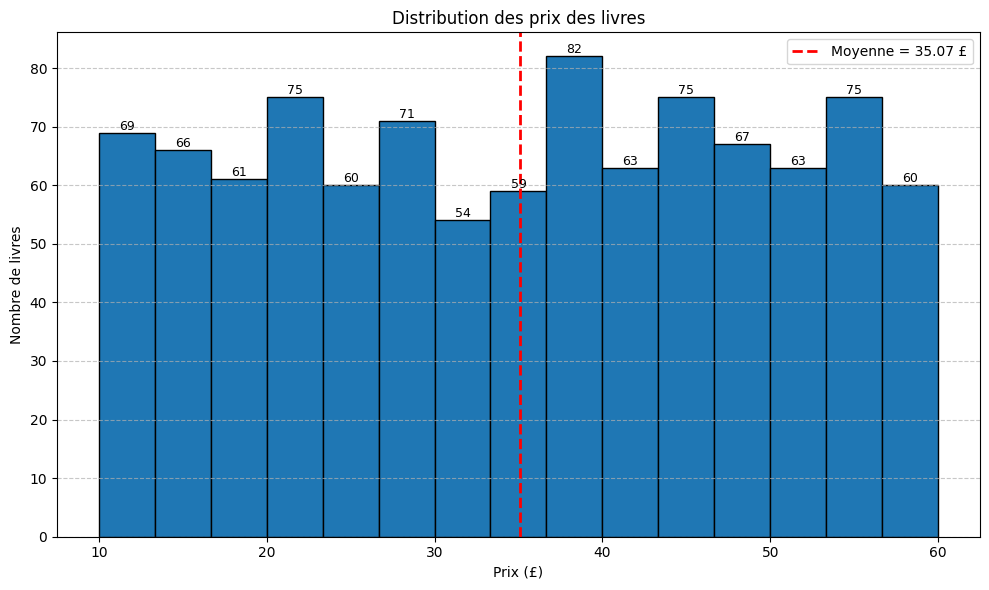

In [35]:
# histogramme de distibution de prix

# Calcul de la moyenne
mean_price = df1['price'].mean()

# Création de l'histogramme
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df1['price'], bins=15, edgecolor='black')

# Ajout de la ligne de moyenne
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2,
            label=f'Moyenne = {mean_price:.2f} £')

# Ajout des étiquettes sur chaque barre
for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        plt.text(patches[i].get_x() + patches[i].get_width() / 2,
                 height + 0.5,
                 str(int(height)),
                 ha='center',
                 fontsize=9)

plt.title("Distribution des prix des livres")
plt.xlabel("Prix (£)")
plt.ylabel("Nombre de livres")
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

* Distribution de la variable 'availability' 

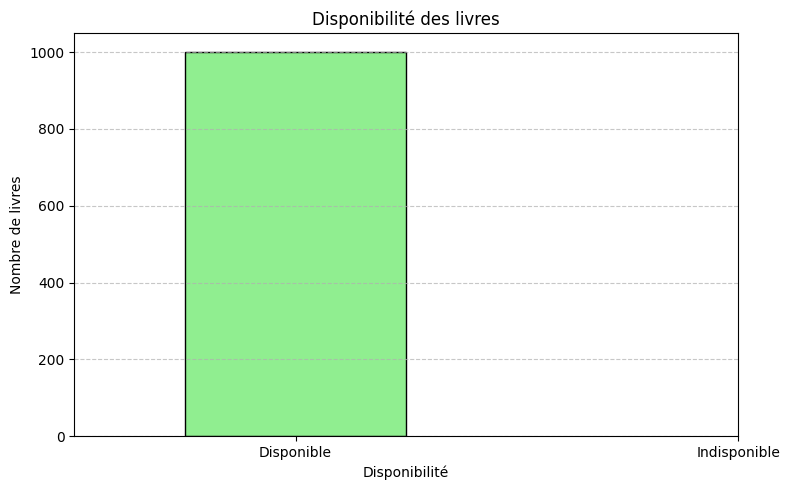

In [36]:
availability_counts = df1['availability'].value_counts()

plt.figure(figsize=(8,5))
availability_counts.plot(kind='bar',color='lightgreen',edgecolor='black')
plt.title("Disponibilité des livres")
plt.xlabel("Disponibilité")
plt.ylabel("Nombre de livres")
plt.xticks(ticks=[0,1], labels=['Disponible','Indisponible'], rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

* Distribution de la variable 'rating'

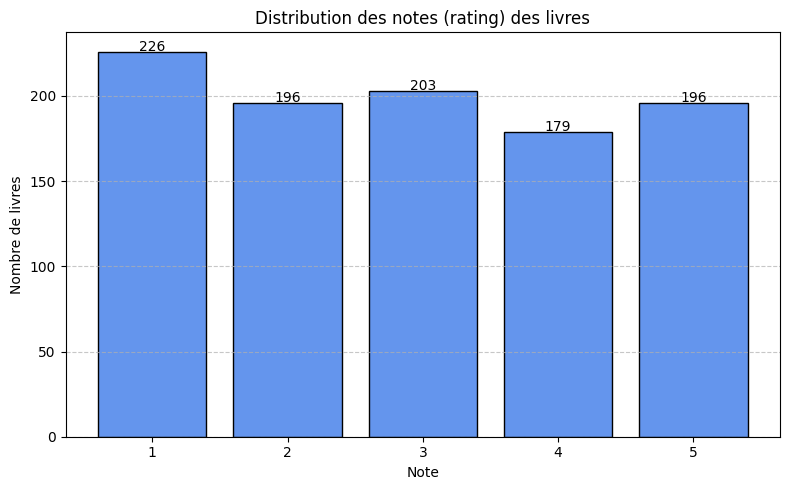

In [37]:
# Distribution des notes (rating)
rating_counts = df1['rating'].value_counts().sort_index()

plt.figure(figsize=(8,5))
bars = plt.bar(rating_counts.index, rating_counts.values, color='cornflowerblue', edgecolor='black')
# ajout des étiquettes
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
            height + 0.5,
            str(int(height)),
            ha = 'center',
            fontsize=10)

plt.title("Distribution des notes (rating) des livres")
plt.xlabel("Note")
plt.ylabel("Nombre de livres")
plt.xticks(rating_counts.index)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

#### Analyser les categories de livres 

* comparer la catégorie 'Books' avec les reste des categories ..


In [38]:
df1['category'].value_counts()

category
Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Classics               19
Poetry                 19
History                18
Womens Fiction         17
Horror                 17
Science Fiction        16
Science                14
Music                  13
Business               12
Travel                 11
Philosophy             11
Thriller               11
Humor                  10
Autobiography           9
Art                     8
Religion                7
Psychology              7
Christian Fiction       6
Spirituality            6
New Adult               6
Sports and Games        5
Biography               5
Self Help               5
Health                  4
Politics                3
Contemporary            3
Chr

In [39]:
df1['is_books'] = df1['category'] == 'Default'

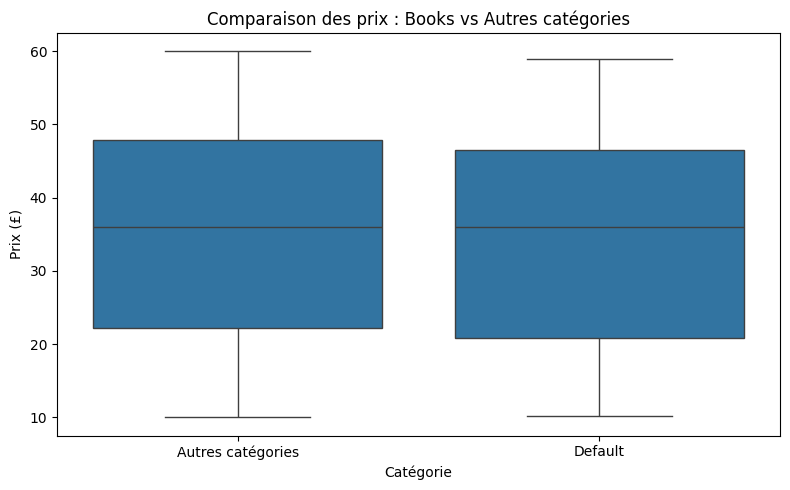

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df1, x='is_books', y='price')
plt.xticks([0,1],['Autres catégories','Default'])
plt.title("Comparaison des prix : Books vs Autres catégories")
plt.xlabel("Catégorie")
plt.ylabel("Prix (£)")
plt.tight_layout()
plt.show()


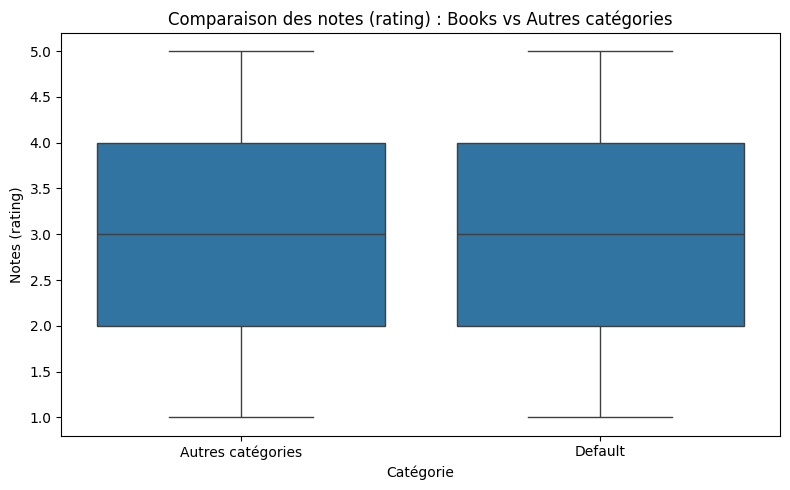

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df1, x='is_books', y='rating')
plt.xticks([0,1],['Autres catégories','Default'])
plt.title("Comparaison des notes (rating) : Books vs Autres catégories")
plt.xlabel("Catégorie")
plt.ylabel("Notes (rating)")
plt.tight_layout()
plt.show()

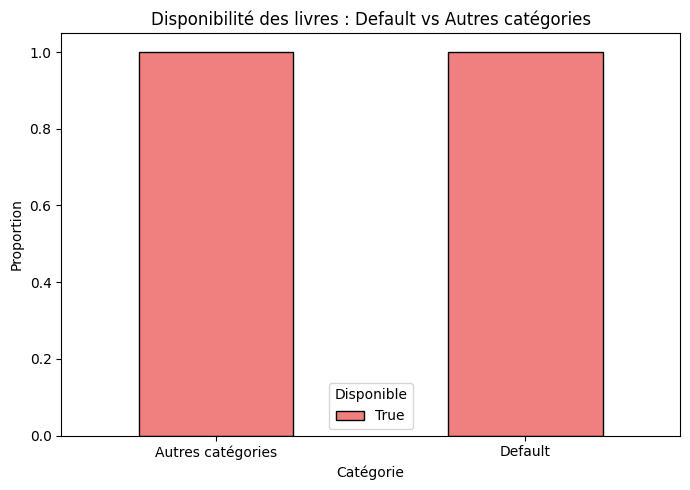

In [42]:
# Calcul des proportions de disponibilité pour Default vs autres
availability_comparison = df1.groupby('is_books')['availability'].value_counts(normalize=True).unstack()

# Tracé
availability_comparison.plot(kind='bar', stacked=True, figsize=(7, 5), color=['lightcoral', 'lightgreen'], edgecolor='black')
plt.title("Disponibilité des livres : Default vs Autres catégories")
plt.xlabel("Catégorie")
plt.ylabel("Proportion")
plt.xticks(ticks=[0, 1], labels=['Autres catégories', 'Default'], rotation=0)
plt.legend(title='Disponible')
plt.tight_layout()
plt.show()




* Création d'un diagramme à barres pour la répartition des livres par catégorie


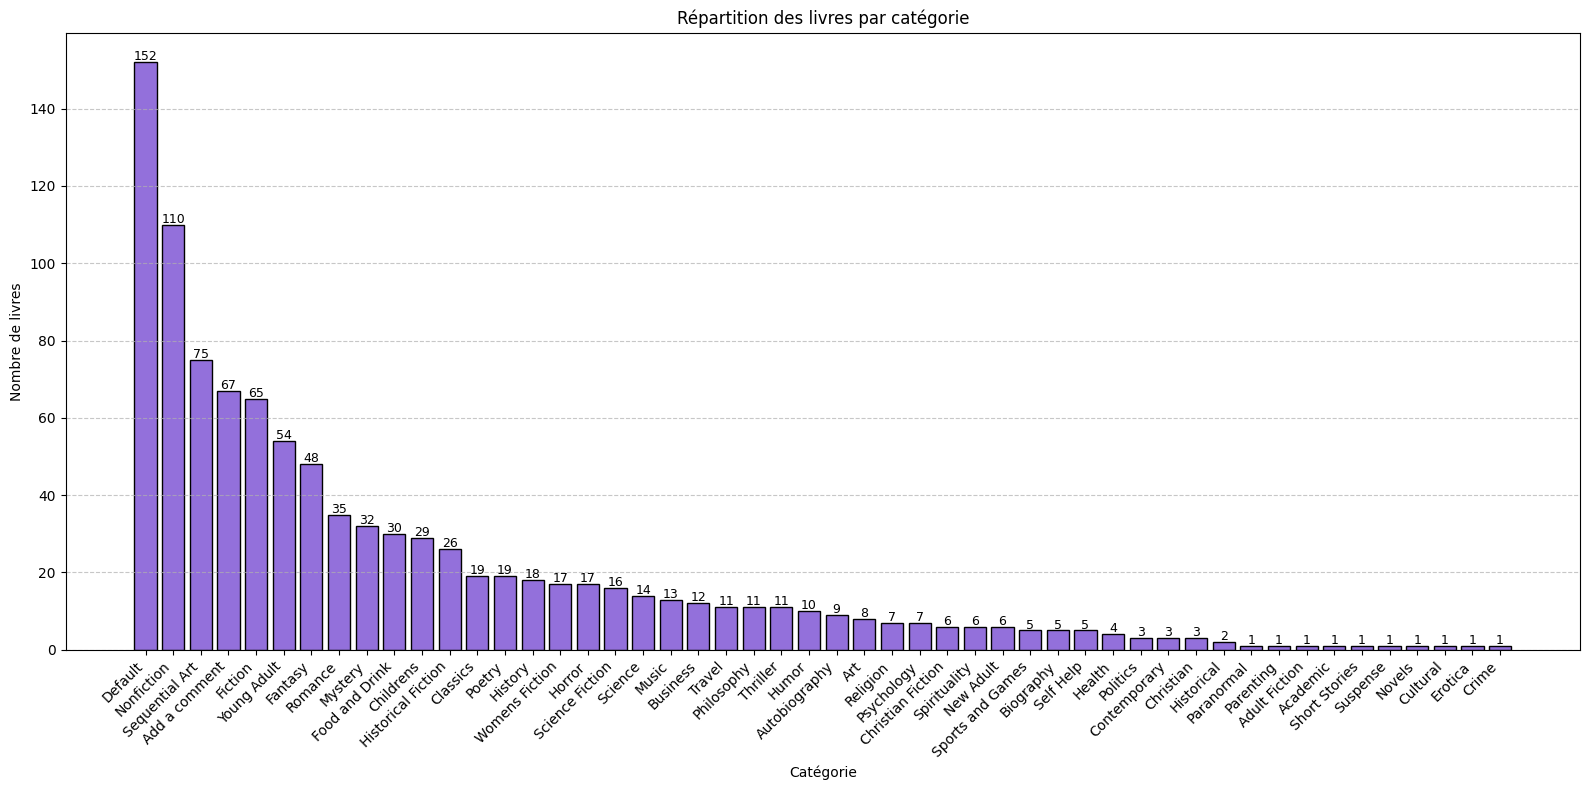

In [43]:
# Comptage du nombre de livres par catégorie
category_counts = df1['category'].value_counts()

# Création du graphique
plt.figure(figsize=(16, 8))
bars = plt.bar(category_counts.index, category_counts.values, color='mediumpurple', edgecolor='black')

# Ajout des étiquettes sur chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height),
             ha='center', fontsize=9)

# Mise en forme du graphique
plt.title("Répartition des livres par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de livres")
plt.xticks(rotation=45, ha='right')  # Rotation pour lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Identifier les valeurs aberrantes (outliers)

* Création d'un boxplot pour le prix par catégorie


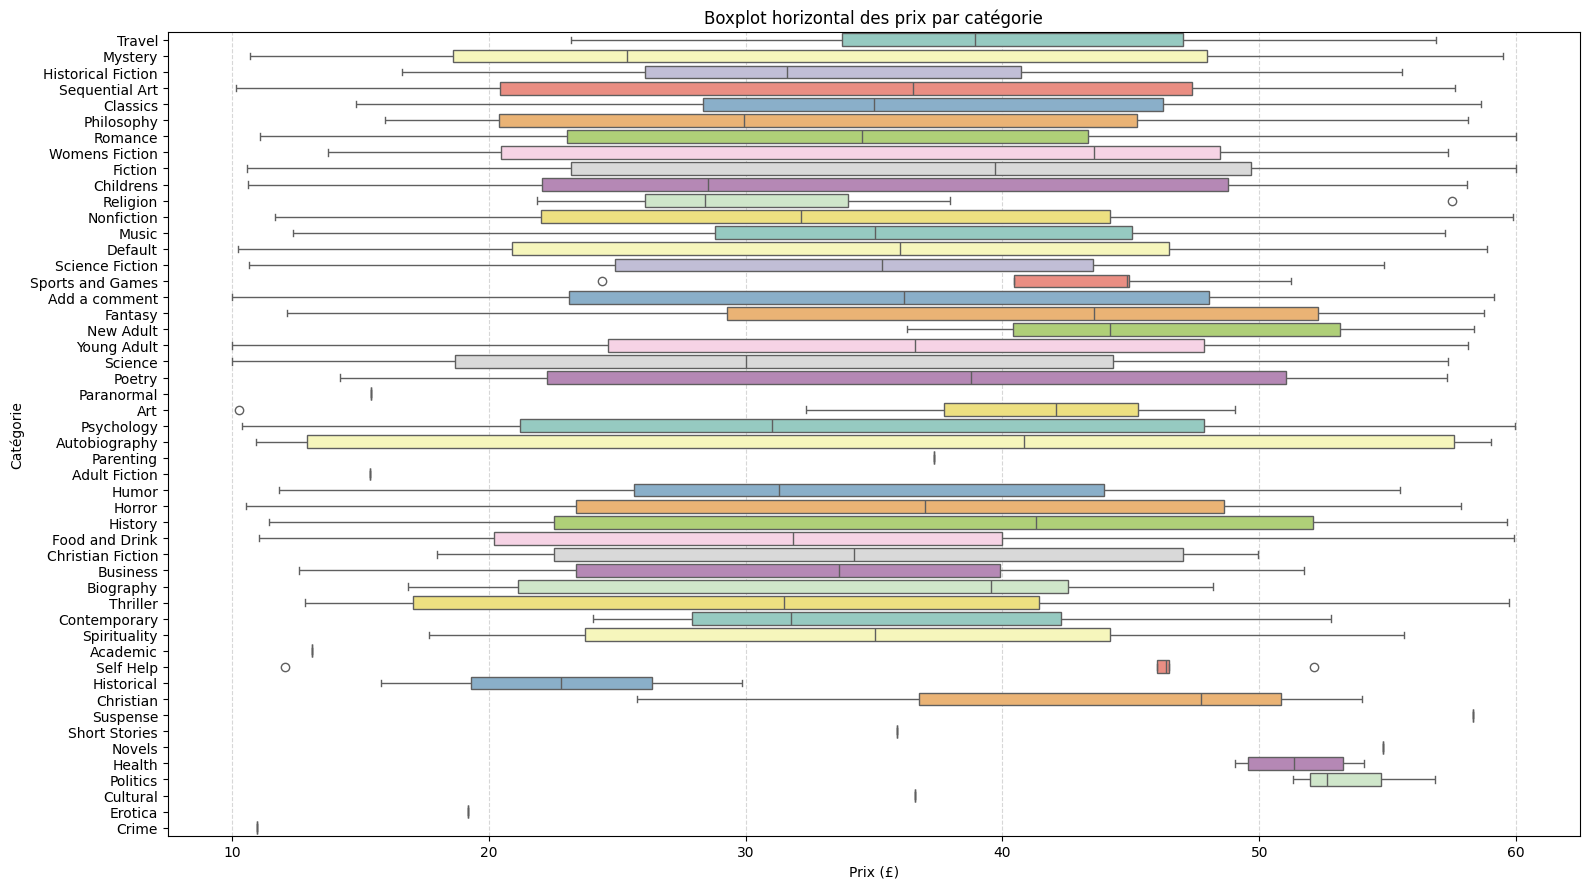

In [44]:
# Boxplot horizontal
plt.figure(figsize=(16, 9))
sns.boxplot(data=df1, y='category', x='price',hue='category', palette='Set3', legend=False)

# Mise en forme
plt.title("Boxplot horizontal des prix par catégorie")
plt.xlabel("Prix (£)")
plt.ylabel("Catégorie")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Ce diagramme à moustaches horizontal permet de visualiser les valeurs aberrantes (outliers) dans chaque catégorie.

Les outliers apparaissent comme des points isolés en dehors des moustaches du boxplot.

Ils représentent des livres dont le prix est anormalement élevé ou bas par rapport à la majorité des livres de leur catégorie.

Certaines catégories comme Science ou Default semblent contenir plus d'outliers, ce qui peut indiquer une variété importante de tarifs ou quelques livres très onéreux.

À l’inverse, des catégories comme Poetry ou Travel présentent des distributions plus resserrées, avec moins d’extrêmes.

## Bonus:

###  Proposer d'autres axes d'analyse

### continuer le scraping du site en récupérant plus d'informations sur les livres..